# Text Analysis


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Loading and Exploration
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/samkhatri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# 2. Data Cleaning
import string
from nltk.tokenize import word_tokenize

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)


# Just show 10 first tokens
tokens[:10]

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'and',
 'dried',
 'herb',
 'the']

In [5]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Just show 10 first filtered_tokens
filtered_tokens[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

In [6]:
# 3. Word Frequency Analysis
from collections import Counter

word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(10)
print(top_words)


[('wine', 78035), ('flavors', 62678), ('fruit', 45016), ('aromas', 39613), ('palate', 38083), ('acidity', 34958), ('finish', 34943), ('tannins', 30854), ('drink', 29966), ('cherry', 27381)]


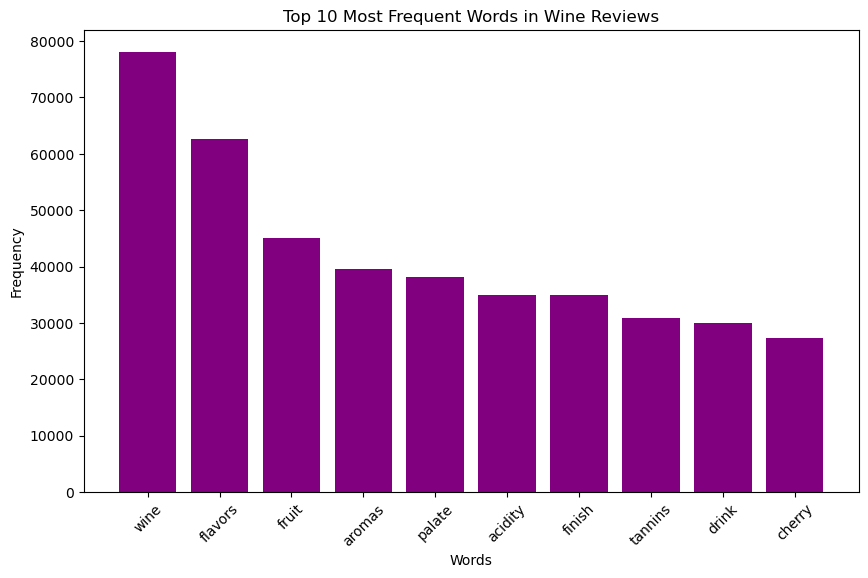

In [7]:
# 4. Visualization
import matplotlib.pyplot as plt

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='purple')
plt.title('Top 10 Most Frequent Words in Wine Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Stemming Algorithms

In [8]:
import pandas as pd

wine_df = pd.read_csv('winemag-data-130k-v2.csv')
food_df = pd.read_csv('Reviews.csv')

In [9]:
print("Wine Reviews:")
wine_df.head()

Wine Reviews:


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
print("Amazon Fine Food Reviews:")
food_df.head()

Amazon Fine Food Reviews:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Truncate datasets to first 100 records
wine_df = wine_df.head(100)
food_df = food_df.head(100)

wine_text = wine_df['description'].str.lower().str.cat(sep=' ')
food_text = food_df['Text'].str.lower().str.cat(sep=' ')

wine_text = wine_text.translate(str.maketrans('', '', string.punctuation))
food_text = food_text.translate(str.maketrans('', '', string.punctuation))

wine_tokens = word_tokenize(wine_text)
food_tokens = word_tokenize(food_text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_wine_tokens = [word for word in wine_tokens if word not in stop_words]
filtered_food_tokens = [word for word in food_tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print(filtered_wine_tokens[:10])

['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'dried', 'herb', 'palate', 'isnt']


In [13]:
print(filtered_food_tokens[:10])

['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality']


In [14]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

wine_porter_stems = [porter.stem(word) for word in filtered_wine_tokens]
food_porter_stems = [porter.stem(word) for word in filtered_food_tokens]

wine_lancaster_stems = [lancaster.stem(word) for word in filtered_wine_tokens]
food_lancaster_stems = [lancaster.stem(word) for word in filtered_food_tokens]

wine_snowball_stems = [snowball.stem(word) for word in filtered_wine_tokens]
food_snowball_stems = [snowball.stem(word) for word in filtered_food_tokens]


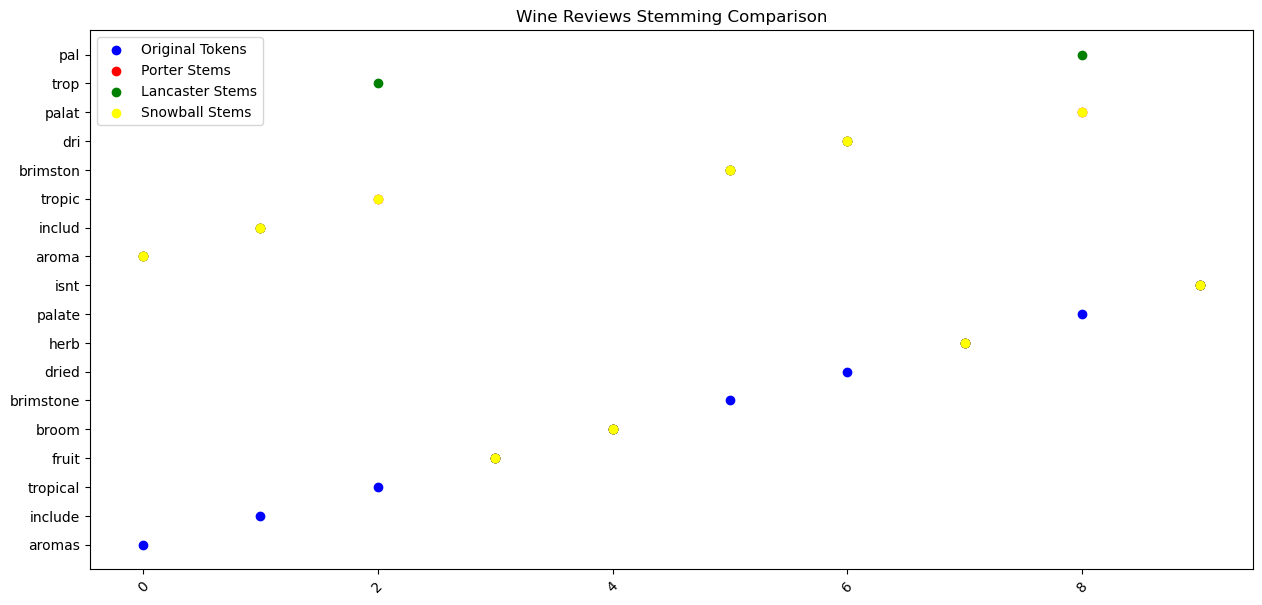

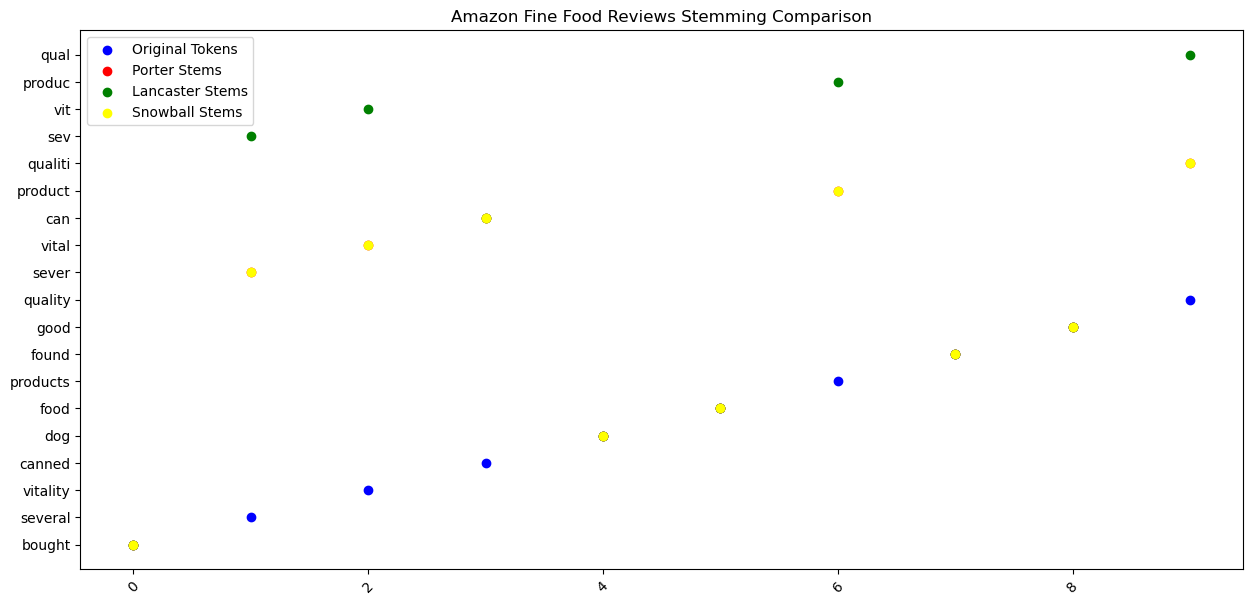

In [15]:
import matplotlib.pyplot as plt

def plot_stems(tokens, porter_stems, lancaster_stems, snowball_stems, title):
    plt.figure(figsize=(15, 7))
    x = range(len(tokens))
    plt.scatter(x, tokens, color='blue', label='Original Tokens')
    plt.scatter(x, porter_stems, color='red', label='Porter Stems')
    plt.scatter(x, lancaster_stems, color='green', label='Lancaster Stems')
    plt.scatter(x, snowball_stems, color='yellow', label='Snowball Stems')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Visualize stems for the first 10 tokens
plot_stems(filtered_wine_tokens[:10], wine_porter_stems[:10], wine_lancaster_stems[:10], wine_snowball_stems[:10], 'Wine Reviews Stemming Comparison')
plot_stems(filtered_food_tokens[:10], food_porter_stems[:10], food_lancaster_stems[:10], food_snowball_stems[:10], 'Amazon Fine Food Reviews Stemming Comparison')


####  Lemmatization Algorithms

In [16]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [17]:
import string
from nltk.tokenize import word_tokenize

# Truncate dataset to first 100 records
df = df.head(100)

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Just show 10 first filtered_tokens
filtered_tokens[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Just show 10 first tokens
lemmatized_tokens[:10]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samkhatri/nltk_data...


['aroma',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

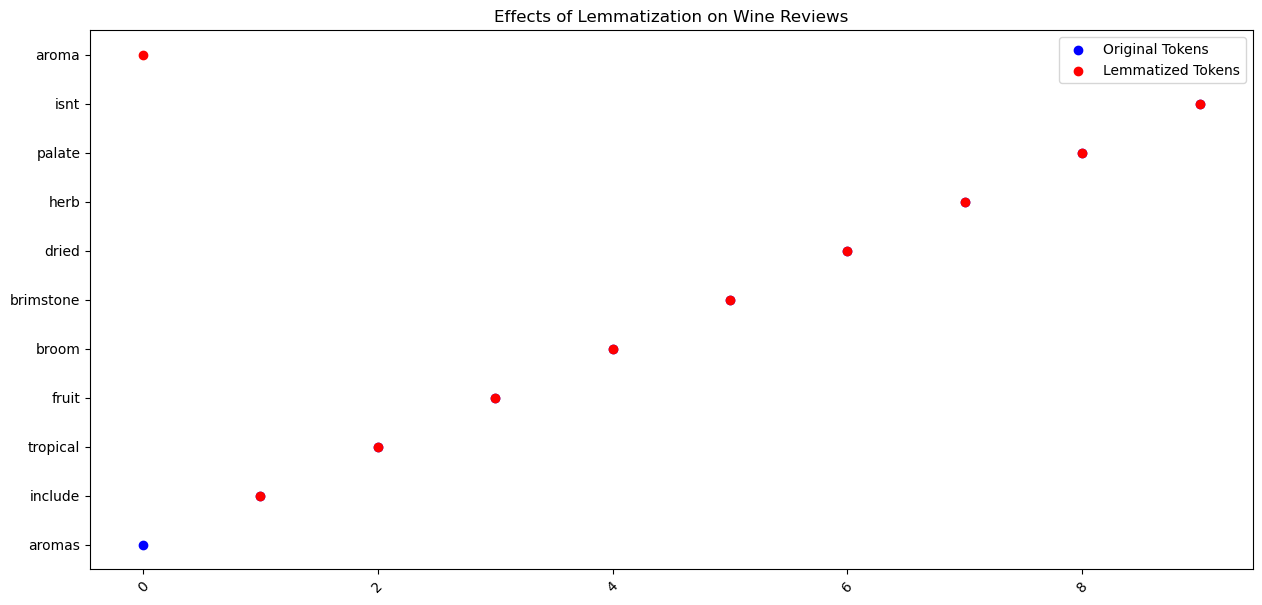

In [19]:
import matplotlib.pyplot as plt

def plot_lemmatization(filtered_tokens, lemmatized_tokens, title):
    plt.figure(figsize=(15, 7))
    x = range(len(filtered_tokens))
    plt.scatter(x, filtered_tokens, color='blue', label='Original Tokens')
    plt.scatter(x, lemmatized_tokens, color='red', label='Lemmatized Tokens')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Visualize lemmatization for the first 10 tokens
plot_lemmatization(filtered_tokens[:10], lemmatized_tokens[:10], 'Effects of Lemmatization on Wine Reviews')


### Zipf's Law

In [20]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [21]:
import string
from nltk.tokenize import word_tokenize

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)


In [22]:
from collections import Counter

word_freq = Counter(tokens)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


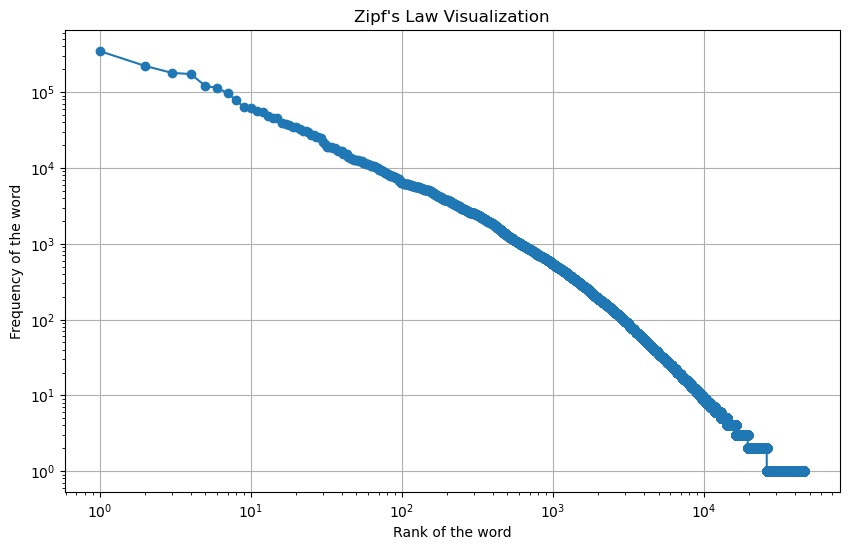

In [23]:
import matplotlib.pyplot as plt
import numpy as np

ranks = np.arange(1, len(sorted_word_freq)+1)
frequencies = [freq for word, freq in sorted_word_freq]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title("Zipf's Law Visualization")
plt.xlabel("Rank of the word")
plt.ylabel("Frequency of the word")
plt.grid(True)
plt.show()


In [24]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [25]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from nltk.util import ngrams

unigrams = list(ngrams(filtered_tokens, 1))
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))

In [27]:
print(unigrams[:10])

[('aromas',), ('include',), ('tropical',), ('fruit',), ('broom',), ('brimstone',), ('dried',), ('herb',), ('palate',), ('isnt',)]


In [28]:
print(bigrams[:10])

[('aromas', 'include'), ('include', 'tropical'), ('tropical', 'fruit'), ('fruit', 'broom'), ('broom', 'brimstone'), ('brimstone', 'dried'), ('dried', 'herb'), ('herb', 'palate'), ('palate', 'isnt'), ('isnt', 'overly')]


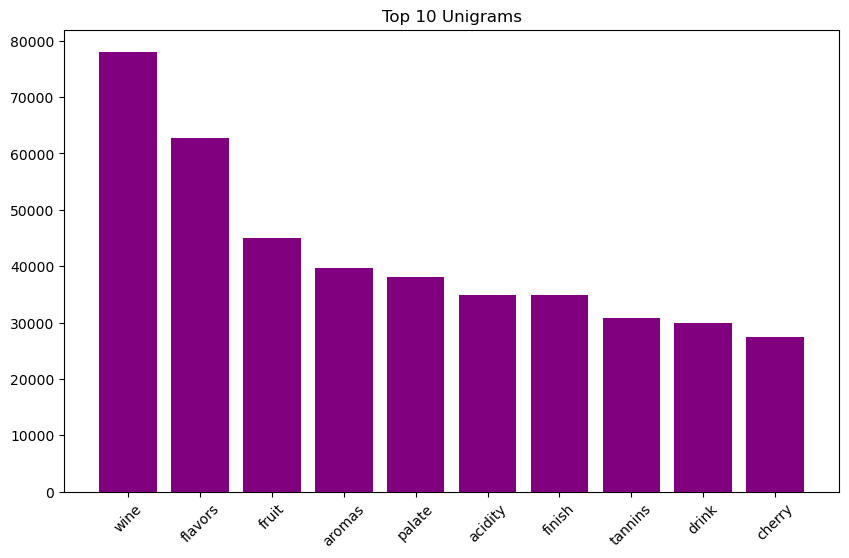

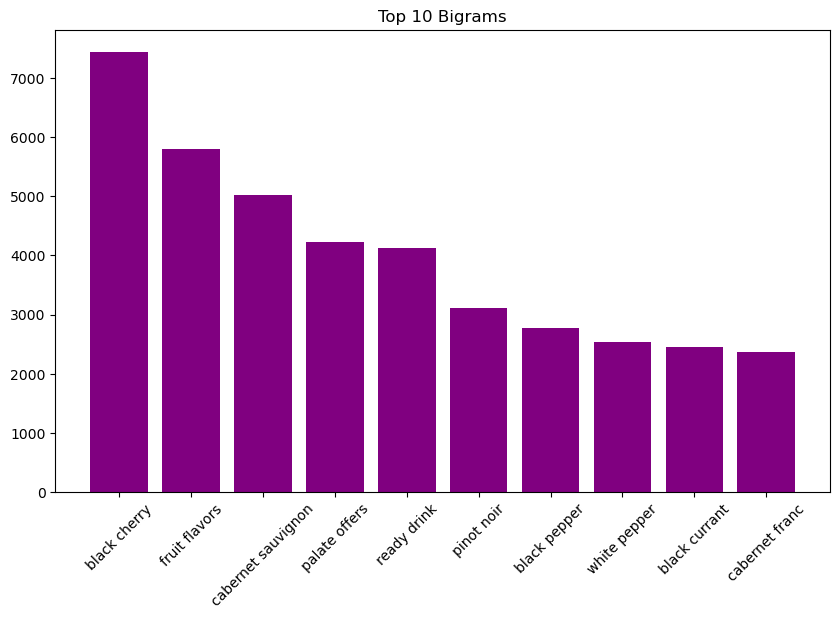

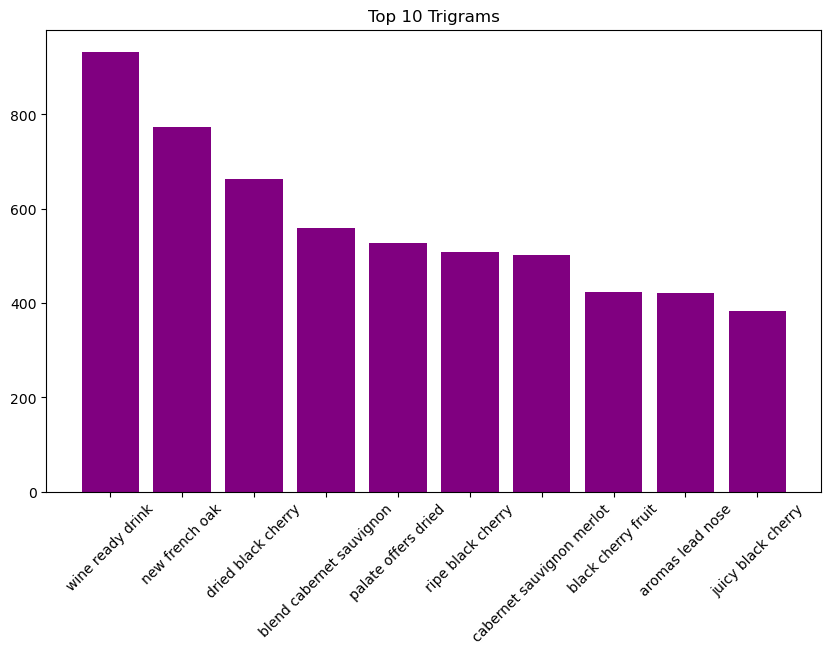

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

top_unigrams = Counter(unigrams).most_common(10)
top_bigrams = Counter(bigrams).most_common(10)
top_trigrams = Counter(trigrams).most_common(10)
def plot_ngrams(ngrams_list, title):
    ngrams, counts = zip(*ngrams_list)
    ngrams = [" ".join(gram) for gram in ngrams]
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, counts, color='purple')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_ngrams(top_unigrams, 'Top 10 Unigrams')
plot_ngrams(top_bigrams, 'Top 10 Bigrams')
plot_ngrams(top_trigrams,'Top 10 Trigrams')

#### WordCloud Visualization

In [34]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [35]:
import string

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))


In [36]:
conda install -c conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /Users/samkhatri/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.9.2            |  py311h80987f9_0         179 KB
    ------------------------------------------------------------
                                           Total:         179 KB

The following NEW packages will be INSTALLED:

  wordcloud          pkgs/main/osx-arm64::wordcloud-1.9.2-py311h80987f9_0 

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2023.08.22-~ --> c

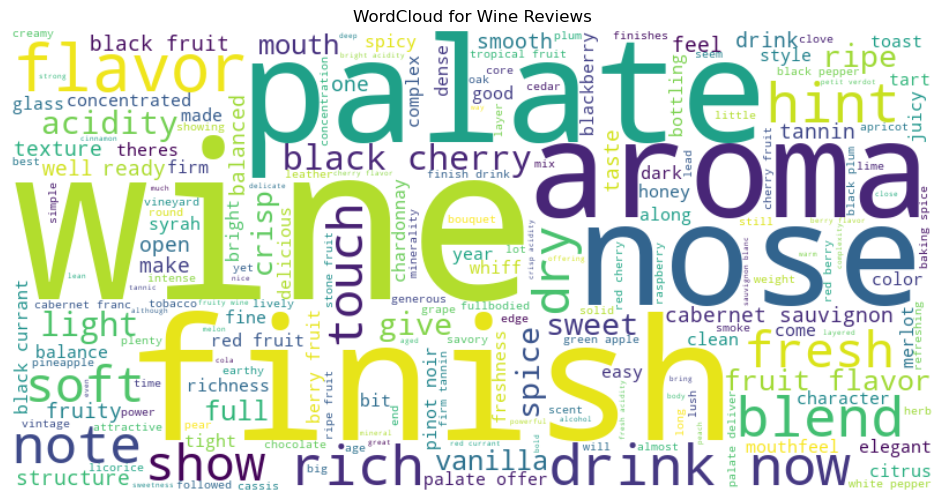

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Wine Reviews')
plt.show()


## Fuzzy Matching

In [43]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df['winery'].head()


0                Nicosia
1    Quinta dos Avidagos
2              Rainstorm
3             St. Julian
4           Sweet Cheeks
Name: winery, dtype: object

In [44]:
from fuzzywuzzy import process

wineries = df['winery'].unique().tolist()
top_matches = process.extract("Hill", wineries, limit=10)
print(top_matches)


[('Heron Hill', 90), ('Claiborne & Churchill', 90), ('Hayman & Hill', 90), ('Autumn Hill', 90), ('Cherry Hill', 90), ('Cavas Hill', 90), ('Jasper Hill', 90), ('Rex Hill', 90), ('Melhill', 90), ('Seven Hills', 90)]


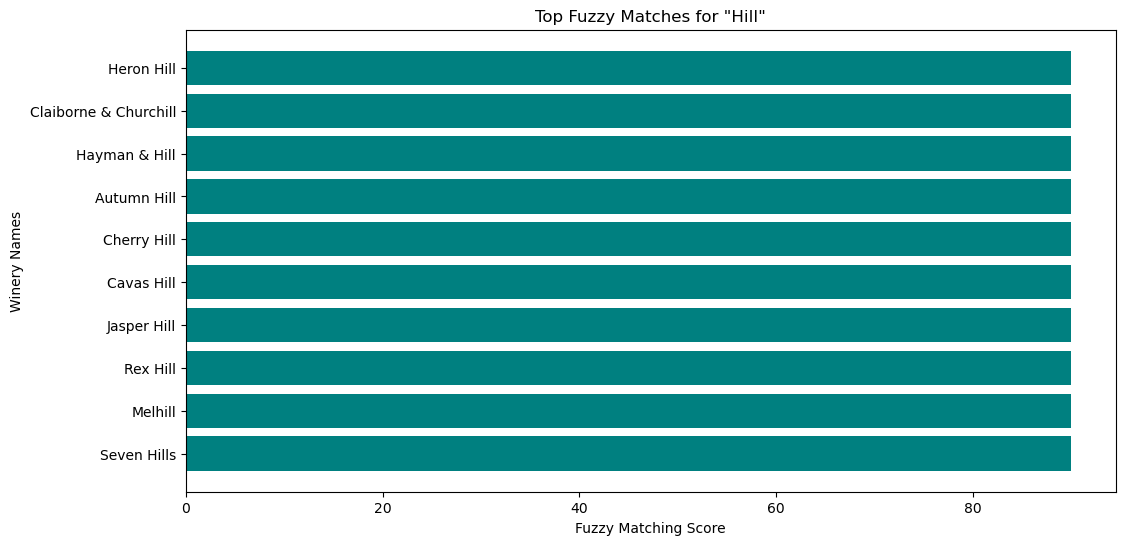

In [45]:
import matplotlib.pyplot as plt

names, scores = zip(*top_matches)

plt.figure(figsize=(12, 6))
plt.barh(names, scores, color='teal')
plt.xlabel('Fuzzy Matching Score')
plt.ylabel('Winery Names')
plt.title('Top Fuzzy Matches for "Hill"')
plt.gca().invert_yaxis()
plt.show()


### Fuzzy Matching Dataframe Merge

In [42]:
import pandas as pd

data1 = {
    'First Name': ['John', 'Jane', 'Robert', 'Alice', 'Steve'],
    'Last Name': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown']
}

data2 = {
    'First Name': ['Jon', 'Janet', 'Rob', 'Alicia', 'Steven'],
    'Last Name': ['Do', 'Smit', 'Johnsen', 'William', 'Browne']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1)
print(df2)


  First Name Last Name
0       John       Doe
1       Jane     Smith
2     Robert   Johnson
3      Alice  Williams
4      Steve     Brown
  First Name Last Name
0        Jon        Do
1      Janet      Smit
2        Rob   Johnsen
3     Alicia   William
4     Steven    Browne


In [46]:
from fuzzywuzzy import fuzz

def get_match(row, master_df, column_name, threshold=80):
    best_match = None
    highest_score = 0
    for item in master_df[column_name]:
        score = fuzz.ratio(row[column_name], item)
        if score > threshold and score > highest_score:
            highest_score = score
            best_match = item
    return best_match

df2['Matched Last Name'] = df2.apply(get_match, master_df=df1, column_name='Last Name', axis=1)


In [47]:
merged_df = pd.merge(df1, df2, left_on='Last Name', right_on='Matched Last Name', suffixes=('_Original', '_Altered'))
merged_df


,First Name_Original,Last Name_Original,First Name_Altered,Last Name_Altered,Matched Last Name
0,Jane,Smith,Janet,Smit,Smith
1,Robert,Johnson,Rob,Johnsen,Johnson
2,Alice,Williams,Alicia,William,Williams
3,Steve,Brown,Steven,Browne,Brown


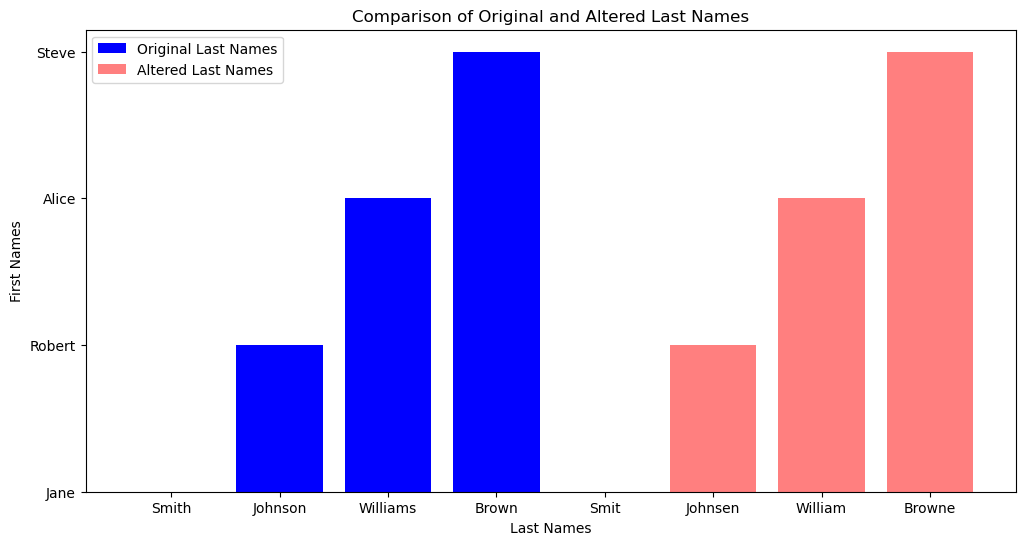

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(merged_df['Last Name_Original'], merged_df.index, color='blue', label='Original Last Names')
plt.bar(merged_df['Last Name_Altered'], merged_df.index, color='red', alpha=0.5, label='Altered Last Names')
plt.yticks(merged_df.index, merged_df['First Name_Original'])
plt.xlabel('Last Names')
plt.ylabel('First Names')
plt.title('Comparison of Original and Altered Last Names')
plt.legend()
plt.show()


# Sentiment Analysis

In [50]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [51]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['description'].apply(get_sentiment)

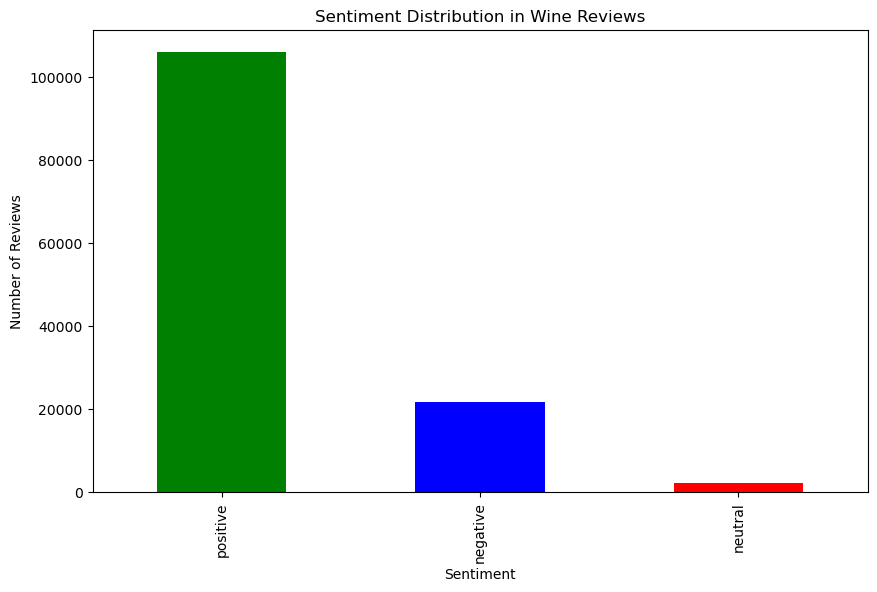

In [52]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution in Wine Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


### Topic Modeling 

In [58]:
import pandas as pd
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.head(100)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a dense wine, packed with both tannins...",NaN,88,20.0,Beaujolais,Juliénas,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy
96,96,France,The wine comes from one of the cru estates fol...,NaN,88,18.0,Beaujolais,Régnié,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy
97,97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill
98,98,Italy,"Forest floor, menthol, espresso, cranberry and...",Dono Riserva,88,30.0,Tuscany,Morellino di Scansano,NaN,Kerin O’Keefe,@kerinokeefe,Serpaia di Endrizzi 2010 Dono Riserva (Morell...,Sangiovese,Serpaia di Endrizzi


In [59]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return tokens

df['processed_description'] = df['description'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/samkhatri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
from gensim import corpora

dictionary = corpora.Dictionary(df['processed_description'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['processed_description']]

from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.016*"fruit" + 0.016*"wine" + 0.016*"tannin" + 0.016*"ripe" + 0.014*"note"')
(1, '0.035*"wine" + 0.028*"acid" + 0.021*"fruit" + 0.021*"flavor" + 0.017*"drink"')
(2, '0.015*"wine" + 0.014*"flavor" + 0.014*"vanilla" + 0.011*"note" + 0.011*"touch"')
(3, '0.019*"flavor" + 0.018*"palat" + 0.017*"aroma" + 0.014*"oak" + 0.014*"fruit"')
(4, '0.027*"aroma" + 0.021*"flavor" + 0.017*"palat" + 0.013*"note" + 0.012*"fruit"')


In [61]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)


## Named Entity Recognition (NER)

In [ ]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.head(100)
df.head()


In [62]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def extract_entities_nltk(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    tree = ne_chunk(pos_tags)
    named_entities = []
    for subtree in tree.subtrees():
        if subtree.label() in ['GPE', 'PERSON', 'ORGANIZATION', 'DATE', 'LOCATION']:
            entity = " ".join([word for word, tag in subtree.leaves()])
            named_entities.append((entity, subtree.label()))
    return named_entities

df['named_entities_nltk'] = df['description'].apply(extract_entities_nltk)
print(df[['description', 'named_entities_nltk']].head(5))


[nltk_data] Downloading package punkt to /Users/samkhatri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/samkhatri/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/samkhatri/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


                                         description named_entities_nltk
0  Aromas include tropical fruit, broom, brimston...     [(Aromas, GPE)]
1  This is ripe and fruity, a wine that is smooth...                  []
2  Tart and snappy, the flavors of lime flesh and...       [(Tart, GPE)]
3  Pineapple rind, lemon pith and orange blossom ...  [(Pineapple, GPE)]
4  Much like the regular bottling from 2012, this...                  []


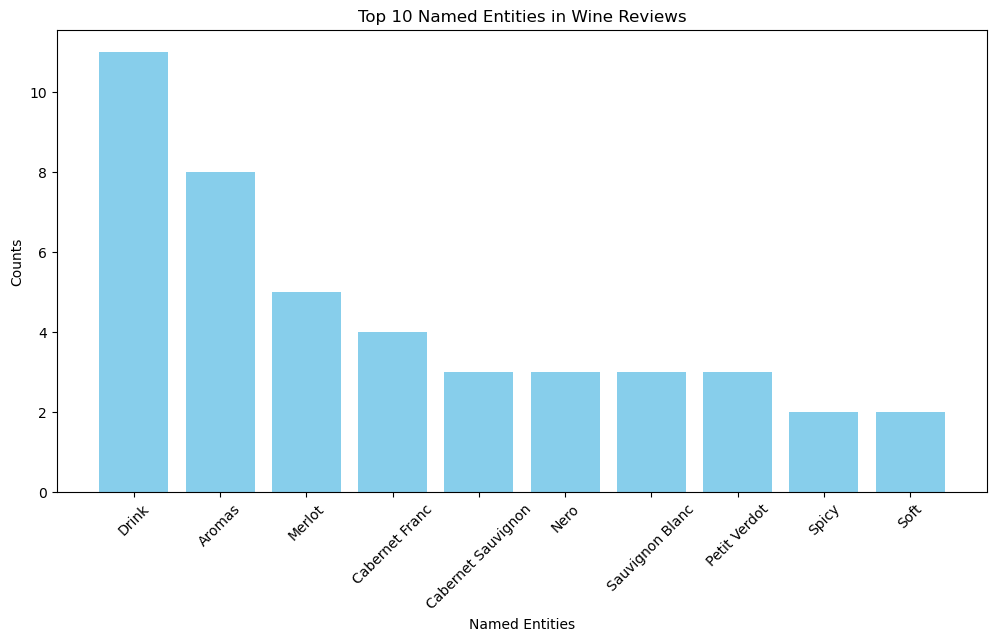

In [63]:
import matplotlib.pyplot as plt
from collections import Counter

all_entities = [entity for sublist in df['named_entities_nltk'] for entity in sublist]
entity_counts = Counter([entity[0] for entity in all_entities])

common_entities = entity_counts.most_common(10)

entities = [item[0] for item in common_entities]
counts = [item[1] for item in common_entities]

plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Named Entities in Wine Reviews')
plt.xlabel('Named Entities')
plt.ylabel('Counts')
plt.show()


---

#### Revised Date: November 18, 2023